In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, classification_report
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

## Informações do data set

In [ ]:
train = pd.read_csv(r'train.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
train.nunique().sort_values()

hypertension             2
heart_disease            2
ever_married             2
Residence_type           2
stroke                   2
gender                   3
smoking_status           4
work_type                5
age                    106
bmi                    407
avg_glucose_level     3740
id                   15304
dtype: int64

## Análise Exploratória

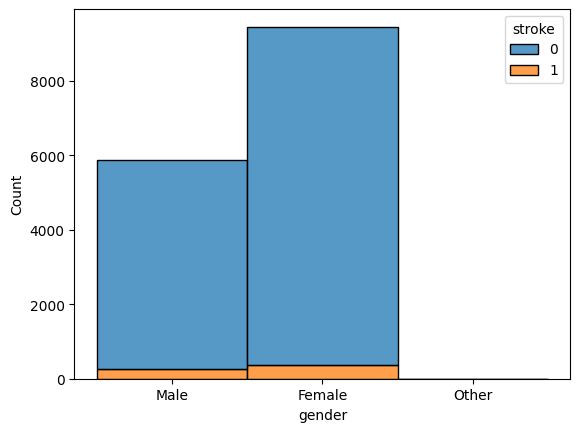

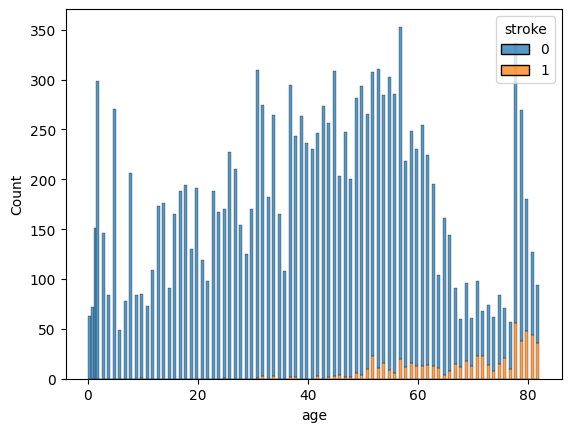

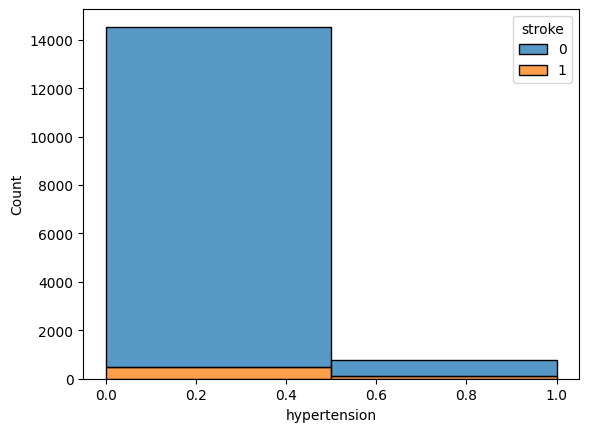

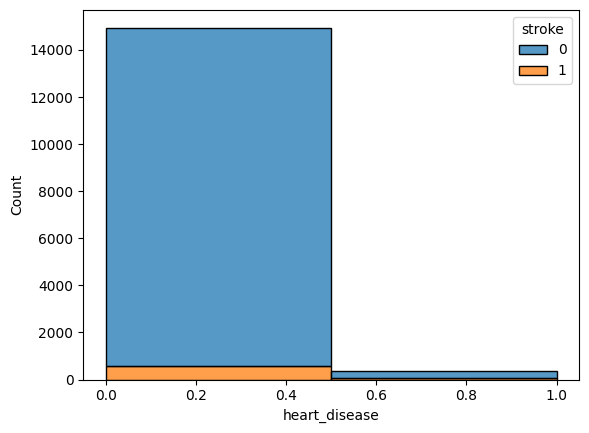

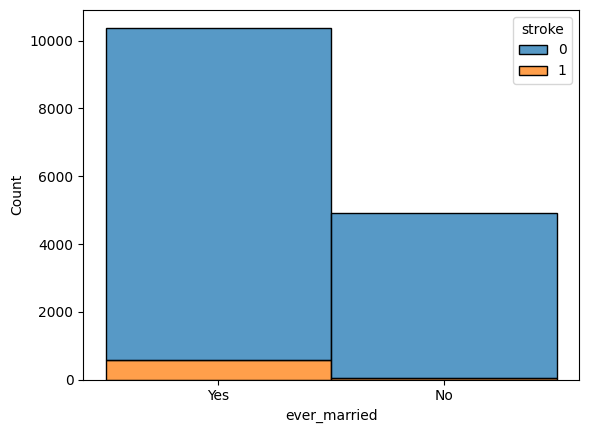

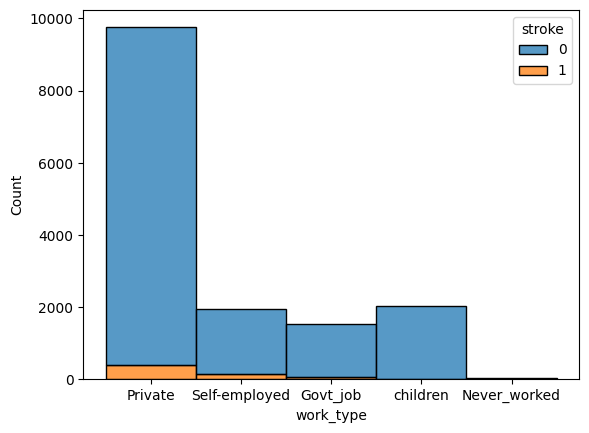

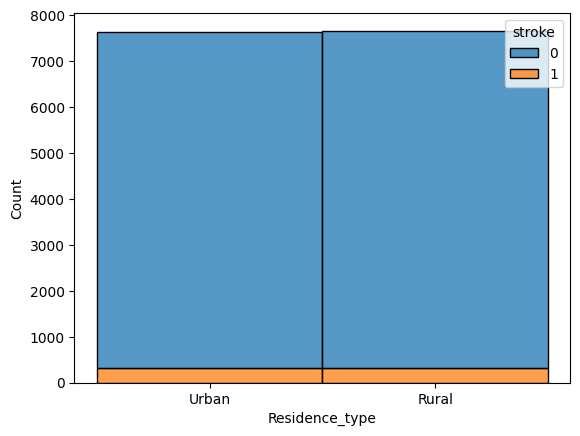

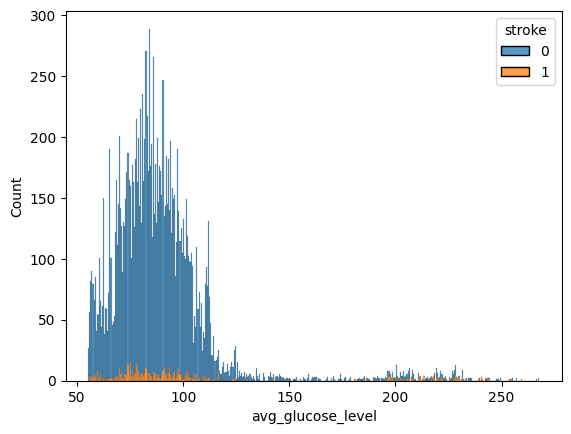

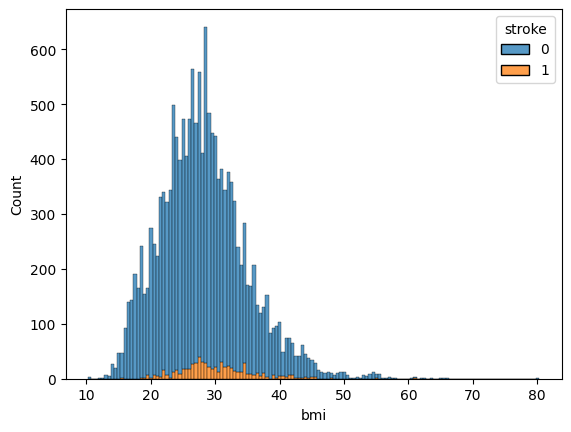

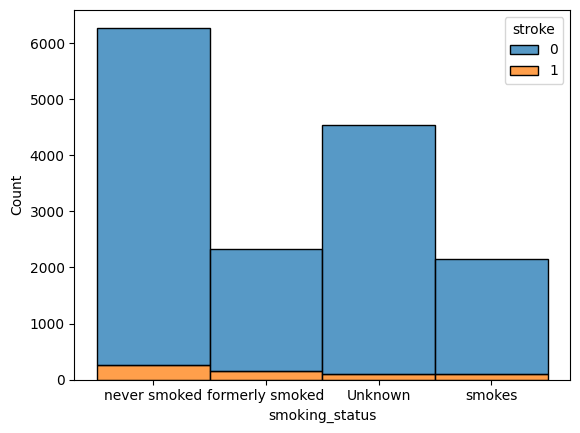

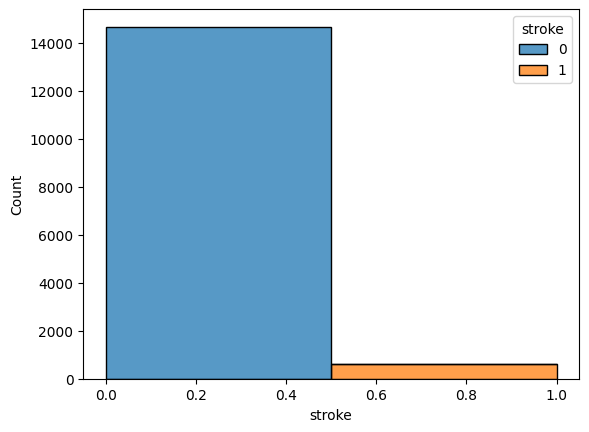

In [ ]:
# Histogramas de features com impacto do target
for i in range(1, len(train.columns)):
  sns.histplot(binwidth=0.5, hue="stroke", x=train.columns[i], data=train, stat="count", multiple="stack")
  plt.show()
  print('\n')



Comentários histogramas:

- Histograma gênero: podemos observar que é um histograma relativamente balanceado, tendo uma prevalência feminina em quantidade.
- Histograma idade: claramente, uma maior idade (acima dos 50 anos) significa ter uma maior chance de sofrer de AVC.
- Histograma hipertensão: Aparentementa há uma menor chance de sofrer de AVC se o indivíduo não tiver quadro de hipertensão, será analisado percentualmente para confirmar essa afirmação.
- Histograma doença de coração: Há maior casos de AVC em indivíduos que não possuem doença no coração, será analisado percentualmente para confirmar essa afirmação.
- Histograma já foi casado: Há maior casos de AVC em indivíduos que já foram casados alguma vez na vida, será analisado percentualmente para confirmar essa afirmação.
- Histograma do tipo de trabalho: Aparentemente, trabalhar no setor privado aumenta as chances de sofre de AVC, será analisado percentualmente para confirmar essa afirmação.
- Histograma tipo de residência: Os casos de indivíduos que sofrem de AVC são quase igualitarimente distribuidos entre os tipos de residências. (Feature descartável?)
- Histograma nível de glucose: Podemos observar que a maioria dos indivíduos possuem o nível de glucose na faixa 80-100, portanto os casos de AVC também se cocentram nessa faixa, porém nos indivíduos com nivel de glucose alto também há uma boa quatidade de casos de AVC propocionalmente falando, na faixa de 200-250. (Necessário cortar outliers?)
- Histograma imc: A distribuição de indivíduos com AVC segue a mesma distribuição do total de indivíduos por imc. (Ideal cortar outliers?)
- Histograma status de fumante: Aparentemente, há mais casos de AVC em indivíduos que nunca fumaram do que os que fumaram e pararam e aqueles que fumaram, será analisado percentualmente para confirmar essa afirmação.
- Histograma AVC: Podemos observar que há uma pequena quantidade de inivíduos que sofreram de AVC nesse conjunto de dados comparado com o total de indivíduos. (Ideal overfitting?)

In [ ]:
# Cálculo da porcentagem de strokes por grupo de algumas classes
hyp = train[['hypertension','stroke']].value_counts()
tot_hyp = hyp[1][0] + hyp[1][1]
tot_n_hyp = hyp[0][0] + hyp[0][1]
hyp_p_stroke_p = hyp[1][1]/tot_hyp*100 # Porcentagem de pessoas de stroke positivo em hypertensos positivos
hyp_n_stroke_p = hyp[0][1]/tot_n_hyp*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos

hd = train[['heart_disease','stroke']].value_counts()
tot_hd = hd[1][0] + hd[1][1]
tot_n_hd = hd[0][0] + hd[0][1]
hd_p_stroke_p = hd[1][1]/tot_hd*100 # Porcentagem de pessoas de stroke positivo em hypertensos positivos
hd_n_stroke_p = hd[0][1]/tot_n_hd*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos

em = train[['ever_married','stroke']].value_counts()
tot_em = em[0] + em[2]
tot_n_em = em[1] + em[3]
em_p_stroke_p = em[2]/tot_em*100 # Porcentagem de pessoas de stroke positivo em hypertensos positivos
em_n_stroke_p = em[3]/tot_n_em*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos

wt = train[['work_type','stroke']].value_counts()
tot_wt_p = wt[0] + wt[4]
tot_wt_se = wt[2] + wt[5]
wt_p_stroke_p = wt[4]/tot_wt_p*100 # Porcentagem de pessoas de stroke positivo em hypertensos positivos
wt_se_stroke_p = wt[5]/tot_wt_se*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos

ss = train[['smoking_status','stroke']].value_counts()
tot_ss_ns = ss[0] + ss[4]
tot_ss_fs = ss[2] + ss[5]
tot_ss_sm = ss[3] + ss[7]
ss_ns_stroke_p = ss[4]/tot_ss_ns*100 # Porcentagem de pessoas de stroke positivo em hypertensos positivos
ss_fs_stroke_p = ss[5]/tot_ss_fs*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos
ss_sm_stroke_p = ss[7]/tot_ss_sm*100 # Porcentagem de pessoas de stroke positivo em hypertensos negativos

print('Porcentagem de hipertensos com AVC:', np.round(hyp_p_stroke_p, 2), '%')
print('Porcentagem de não hipertensos com AVC:', np.round(hyp_n_stroke_p, 2), '%\n')

print('Porcentagem de doentes do coração com AVC:', np.round(hd_p_stroke_p, 2), '%')
print('Porcentagem de não doentes do coração com AVC:', np.round(hd_n_stroke_p, 2), '%\n')

print('Porcentagem de já casado com AVC:', np.round(em_p_stroke_p, 2), '%')
print('Porcentagem de nunca casado com AVC:', np.round(em_n_stroke_p, 2), '%\n')

print('Porcentagem de tipo de trabalho privativo com AVC:', np.round(wt_p_stroke_p, 2), '%')
print('Porcentagem de tipo de trabalho empregado próprio com AVC:', np.round(wt_se_stroke_p, 2), '%\n')

print('Porcentagem de status não fumante com AVC:', np.round(ss_ns_stroke_p, 2), '%')
print('Porcentagem de status ex fumante com AVC:', np.round(ss_fs_stroke_p, 2), '%')
print('Porcentagem de status fumante com AVC:', np.round(ss_sm_stroke_p, 2), '%')

Porcentagem de hipertensos com AVC: 16.82 %
Porcentagem de não hipertensos com AVC: 3.47 %

Porcentagem de doentes do coração com AVC: 18.49 %
Porcentagem de não doentes do coração com AVC: 3.79 %

Porcentagem de já casado com AVC: 5.69 %
Porcentagem de nunca casado com AVC: 0.83 %

Porcentagem de tipo de trabalho privativo com AVC: 4.14 %
Porcentagem de tipo de trabalho empregado próprio com AVC: 8.15 %

Porcentagem de status não fumante com AVC: 4.09 %
Porcentagem de status ex fumante com AVC: 6.8 %
Porcentagem de status fumante com AVC: 5.04 %


Comentários sobre a análise de percentual de AVC pro classe:

Podemos observar que em alguns casos podemos visualizar qual grupo tem predominância naquela classe proporcionalmente, mas em alguns casos como no tipo de trabalho e no status de fumante, vemos que propocionalmente temos um resultado diferente do que é visualizado no histograma.

<ipython-input-8-5f8d8f962de5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.drop(['id'],axis=1).corr(), annot=True, cmap='viridis')


<Axes: >

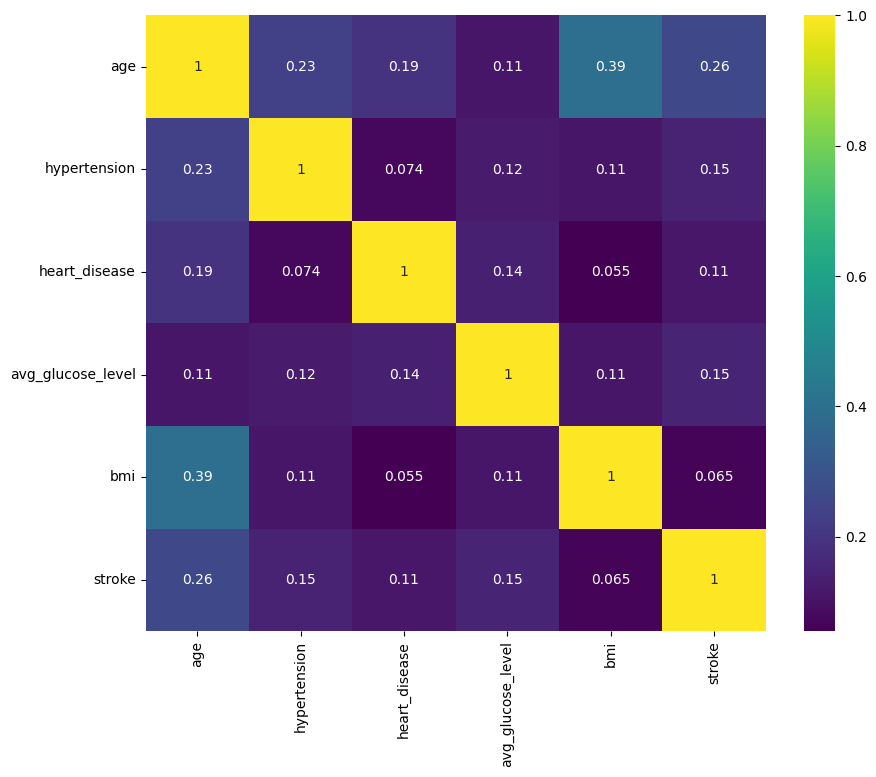

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.drop(['id'],axis=1).corr(), annot=True, cmap='viridis')

Comentários sobre o heatmap:

Podemos observar que as features tem pouca correlação com o target stroke, sendo a de maior correlação a idade. Um ponto interessante é a correlação da idade com o icm, talvez uma combinação delas possa ser de bom uso, já que a idade tem uam certa correlação com o target.

## CONTINUAÇÃO

In [ ]:
train = pd.read_csv(r'train.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train['div_gluc_bmi'] = train['avg_glucose_level']/train['bmi']
train['mult_gluc_bmi'] = train['avg_glucose_level']*train['bmi']
train['age_bmi'] = (train['age'] + train['bmi'])/train['age']

In [ ]:
ages = train.age
quantile_1 = ages.quantile(.25)
quantile_2 = ages.quantile(.5)
quantile_3 = ages.quantile(.75)

def classify_age(age):
    if age <= quantile_1:
        return 'Idade_q1'
    elif quantile_1 < age <= quantile_2:
        return 'Idade_q2'
    elif quantile_2 < age <= quantile_3:
        return 'Idade_q3'
    else:
        return 'Idade_q4'

train.age = train.age.apply(lambda x: classify_age(x))

In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,div_gluc_bmi,mult_gluc_bmi,age_bmi
0,0,Male,Idade_q2,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,2.557235,2473.383,2.110714
1,1,Male,Idade_q2,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,3.282008,1874.716,1.724242
2,2,Female,Idade_q2,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,2.555831,4150.900,1.959524
3,3,Male,Idade_q3,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,2.252431,1868.256,1.514286
4,4,Female,Idade_q1,0,0,No,Private,Rural,73.36,28.8,never smoked,0,2.547222,2112.768,2.200000


In [ ]:
#Variáveis categóricas que precisam ser codificadas
categoricos = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','age']

#Aplicar codificação one-hot para as variáveis categóricas
train_data_normalizado = pd.get_dummies(train, columns=categoricos)




In [ ]:
train_data_normalizado.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,div_gluc_bmi,mult_gluc_bmi,age_bmi,gender_Female,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_Idade_q1,age_Idade_q2,age_Idade_q3,age_Idade_q4
0,0,0,0,79.53,31.1,0,2.557235,2473.383,2.110714,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,78.44,23.9,0,3.282008,1874.716,1.724242,0,...,1,0,0,1,0,0,0,1,0,0
2,2,0,0,103.00,40.3,0,2.555831,4150.900,1.959524,1,...,1,0,1,0,0,0,0,1,0,0
3,3,0,0,64.87,28.8,0,2.252431,1868.256,1.514286,0,...,0,1,0,0,1,0,0,0,1,0
4,4,0,0,73.36,28.8,0,2.547222,2112.768,2.200000,1,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
numericas = ['avg_glucose_level', 'bmi', 'div_gluc_bmi', 'mult_gluc_bmi', 'age_bmi']

scaler = MinMaxScaler()

train_data_normalizado[numericas] = scaler.fit_transform(train_data_normalizado[numericas])


train_data_normalizado.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,div_gluc_bmi,mult_gluc_bmi,age_bmi,gender_Female,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_Idade_q1,age_Idade_q2,age_Idade_q3,age_Idade_q4
0,0,0,0,0.114465,0.297994,0,0.101945,0.136228,0.002205,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0.109332,0.194842,0,0.149781,0.091794,0.001273,0,...,1,0,0,1,0,0,0,1,0,0
2,2,0,0,0.224974,0.429799,0,0.101853,0.260738,0.001840,1,...,1,0,1,0,0,0,0,1,0,0
3,3,0,0,0.045437,0.265043,0,0.081828,0.091314,0.000767,0,...,0,1,0,0,1,0,0,0,1,0
4,4,0,0,0.085413,0.265043,0,0.101284,0.109463,0.002420,1,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
# Undersampling
positive_stroke = train_data_normalizado[train_data_normalizado.stroke == 1]
negative_stroke = train_data_normalizado[train_data_normalizado.stroke == 0]

n_strokes = len(positive_stroke)
strokes_fraction = 1

sampled_negative_strokes = negative_stroke.sample(int(n_strokes//strokes_fraction), random_state=42)

train_undersampling = pd.concat([sampled_negative_strokes,positive_stroke])
negative_strokes_remaining = negative_stroke.drop(index = list(sampled_negative_strokes.index))

In [ ]:
train_undersampling

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,div_gluc_bmi,mult_gluc_bmi,age_bmi,gender_Female,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_Idade_q1,age_Idade_q2,age_Idade_q3,age_Idade_q4
12620,12620,0,0,0.173180,0.240688,0,0.157228,0.137699,0.002368,1,...,0,1,0,0,1,0,1,0,0,0
1522,1522,0,0,0.081317,0.113181,0,0.196046,0.050571,0.021465,1,...,0,1,1,0,0,0,1,0,0,0
14944,14944,0,0,0.204115,0.362464,0,0.115910,0.213102,0.001033,0,...,0,1,0,0,1,0,0,0,1,0
14112,14112,0,0,0.323053,0.174785,0,0.296407,0.159445,0.001077,1,...,0,1,0,1,0,0,0,1,0,0
2137,2137,0,0,0.108673,0.277937,0,0.107168,0.125253,0.002510,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,15225,0,1,0.027121,0.269341,1,0.071472,0.084357,0.000450,1,...,1,0,0,0,1,0,0,0,0,1
15246,15246,0,0,0.191261,0.187679,1,0.203488,0.119103,0.000223,0,...,1,0,1,0,0,0,0,0,0,1
15250,15250,0,0,0.203268,0.484241,1,0.080418,0.274700,0.001114,0,...,1,0,0,1,0,0,0,0,0,1
15275,15275,0,0,0.206611,0.177650,1,0.221302,0.119616,0.000320,1,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
comparacao_modelos = {}

In [ ]:
####################################################################

## KNN e Regressão Logística com Undersampling

In [ ]:
# Dados de treino e teste
X = train_undersampling.drop(['stroke', 'id'], axis=1)
y = train_undersampling['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Adição dos dados não selecionados no undersampling
X_test = pd.concat([X_test,negative_strokes_remaining.drop(['stroke', 'id'], axis=1)])
y_test = pd.concat([y_test,negative_strokes_remaining['stroke']])

In [ ]:
## Análise simples de KNN e Árvore de Decisão

#Classificador KNN
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#Classificador Árvore de Decisão
# ad = DecisionTreeClassifier()
# ad.fit(X_train, y_train)
# y_pred_ad = ad.predict(X_test)

#Classificador Árvore de Regressão
# ar = DecisionTreeRegressor()
# ar.fit(X_train, y_train)
# y_pred_ar = ar.predict(X_test)

#Classificador Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Métricas KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average = 'binary')
knn_recall = recall_score(y_test, y_pred_knn, average = 'binary')
knn_f1 = f1_score(y_test, y_pred_knn, average = 'binary')

#Métricas AD
# ad_accuracy = accuracy_score(y_test, y_pred_ad)
# ad_precision = precision_score(y_test, y_pred_ad, average = 'binary')
# ad_recall = recall_score(y_test, y_pred_ad, average = 'binary')
# ad_f1 = f1_score(y_test, y_pred_ad, average = 'binary')

#Métricas AR
#ar_accuracy = accuracy_score(y_test, y_pred_ar)
#ar_precision = precision_score(y_test, y_pred_ar, average = 'binary')
#ar_recall = recall_score(y_test, y_pred_ar, average = 'binary')
#ar_f1 = f1_score(y_test, y_pred_ar, average = 'binary')

#Métricas RL
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average = 'binary')
lr_recall = recall_score(y_test, y_pred_lr, average = 'binary')
lr_f1 = f1_score(y_test, y_pred_lr, average = 'binary')

print("Métricas para KNN Undersampling:")
print("Acurácia:", np.round(knn_accuracy*100))
print("Precisão:",  np.round(knn_precision*100))
print("Recall:",  np.round(knn_recall*100))
print("F1:",  np.round(knn_f1*100))

#print("\nMétricas para Árvore de Decisão:")
#print("Acurácia:", ad_accuracy)
#print("Precisão:", ad_precision)
#print("Recall:", ad_recall)
#print("F1:", ad_f1)

#print("\nMétricas para Árvore de Regressão:")
#print("Acurácia:", ar_accuracy)
#print("Precisão:", ar_precision)
#print("Recall:", ar_recall)
#print("F1:", ar_f1)

print("\nMétricas para Regressão Logística Undersampling:")
print("Acurácia:", np.round(lr_accuracy*100))
print("Precisão:", np.round(lr_precision*100))
print("Recall:", np.round(lr_recall*100))
print("F1:", np.round(lr_f1*100))

comparacao_modelos['KNN_Undersampling'] = [knn_accuracy, knn_precision, knn_recall]
comparacao_modelos['RL_Undersampling'] = [lr_accuracy, lr_precision, lr_recall]

Métricas para KNN Undersampling:
Acurácia: 70.0
Precisão: 2.0
Recall: 81.0
F1: 4.0

Métricas para Regressão Logística Undersampling:
Acurácia: 74.0
Precisão: 3.0
Recall: 85.0
F1: 5.0


Text(0.5, 1.0, 'Matriz confusão KNN Undersampling')

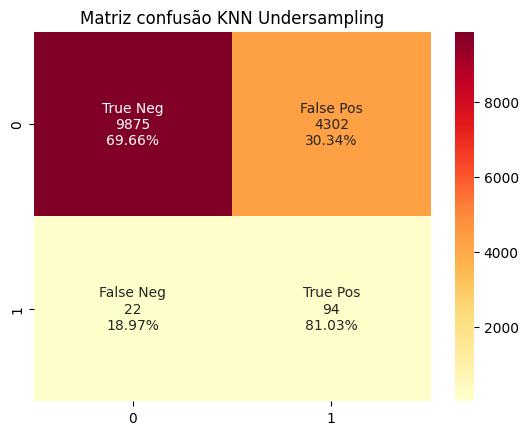

In [ ]:
cf_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
(tn, fp, fn, tp)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_knn.flatten()]
g = [tn/(tn+fp), fp/(tn+fp), fn/(fn+tp), tp/(fn+tp)]
group_percentages = ["{0:.2%}".format(value) for value in
                     g]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_knn, annot=labels, fmt='', cmap='YlOrRd')
plt.title('Matriz confusão KNN Undersampling')

## Análise variando parâmetros KNN Undersampling

In [ ]:
# Análise comparativa KNN e ad para variados test_size

X = train_undersampling.drop(['stroke', 'id'], axis=1)
y = train_undersampling['stroke']

knn_recall = []
ad_recall = []
cont = []
knn_precision = []
ad_precision = []
for i in range(1, 100, 10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)

  X_test = pd.concat([X_test,negative_strokes_remaining.drop(['stroke', 'id'], axis=1)])
  y_test = pd.concat([y_test,negative_strokes_remaining['stroke']])

  #Classificador KNN
  knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)

  #Classificador Árvore de Decisão
  ad = DecisionTreeClassifier()
  ad.fit(X_train, y_train)
  y_pred_ad = ad.predict(X_test)

  #Métricas KNN
  knn_recall.append(recall_score(y_test, y_pred_knn, average = 'binary'))
  knn_precision.append(precision_score(y_test, y_pred_knn, average = 'binary'))

  #Métricas AD
  ad_recall.append(recall_score(y_test, y_pred_ad))
  ad_precision.append(precision_score(y_test, y_pred_knn, average = 'binary'))

  cont.append(i/100)

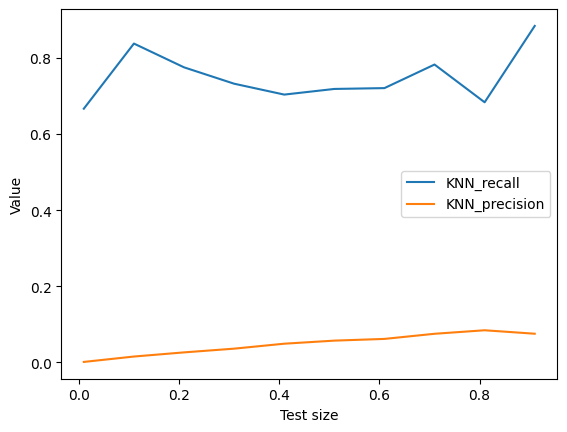

In [ ]:
plt.plot(cont,knn_recall, label='KNN_recall')
plt.plot(cont,knn_precision, label='KNN_precision')
plt.xlabel('Test size')
plt.ylabel('Value')
plt.legend()

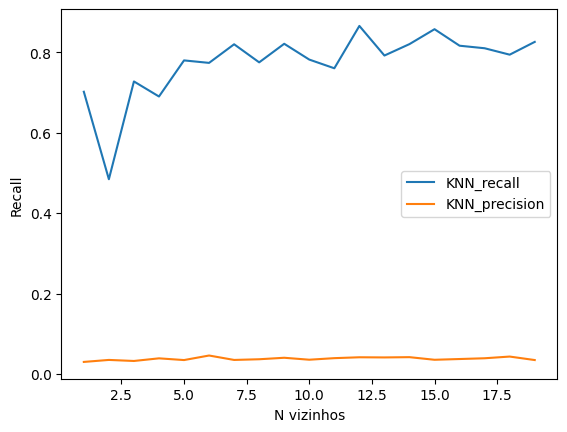

In [ ]:
# Análise comparativa KNN e ad para variados n_neighbors

X = train_undersampling.drop(['stroke', 'id'], axis=1)
y = train_undersampling['stroke']

knn_recall = []
ad_recall = []
cont = []
knn_precision = []
for i in range(1, 20, 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  X_test = pd.concat([X_test,negative_strokes_remaining.drop(['stroke', 'id'], axis=1)])
  y_test = pd.concat([y_test,negative_strokes_remaining['stroke']])

  #Classificador KNN
  knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)

  #Métricas KNN
  knn_recall.append(recall_score(y_test, y_pred_knn))
  knn_precision.append(precision_score(y_test, y_pred_knn, average = 'binary'))


  cont.append(i)

plt.plot(cont,knn_recall, label='KNN_recall')
plt.plot(cont,knn_precision, label='KNN_precision')
plt.xlabel('N vizinhos')
plt.ylabel('Recall')
plt.legend()

## KNN e Regressão Logística com Oversampling

In [ ]:
train = pd.read_csv(r'train.csv')
train.head()
train = pd.get_dummies(train, columns=categoricos)
train.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,age_73.0,age_74.0,age_75.0,age_76.0,age_77.0,age_78.0,age_79.0,age_80.0,age_81.0,age_82.0
0,0,0,0,79.53,31.1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,78.44,23.9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,103.00,40.3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,64.87,28.8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,73.36,28.8,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data_normalizado.drop(['stroke','id'], axis=1)
y = train_data_normalizado['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
train_data_normalizado['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [ ]:
sm = SMOTE(random_state=2,k_neighbors=3,sampling_strategy='minority')

In [ ]:
X_train,y_train=sm.fit_resample(X,y)

In [ ]:
#Classificador KNN

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#Classificador Regressão Logística
lr = LogisticRegression(solver = 'liblinear', max_iter=1000, random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Métricas KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average = 'binary')
knn_recall = recall_score(y_test, y_pred_knn, average = 'binary')
knn_f1 = f1_score(y_test, y_pred_knn, average = 'binary')


#Métricas RL
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average = 'binary')
lr_recall = recall_score(y_test, y_pred_lr, average = 'binary')
lr_f1 = f1_score(y_test, y_pred_lr, average = 'binary')


#print(classification_report(y_test, y_pred_knn))
print('Métricas para KNN Oversampling:')
print("Acurácia:", np.round(knn_accuracy*100))
print("Precisão:",  np.round(knn_precision*100))
print("Recall:",  np.round(knn_recall*100))
print("F1:",  np.round(knn_f1*100))


print("\nMétricas para Regressão Logística Oversampling:")
print("Acurácia:", np.round(lr_accuracy*100))
print("Precisão:", np.round(lr_precision*100))
print("Recall:", np.round(lr_recall*100))
print("F1:", np.round(lr_f1*100))


comparacao_modelos['KNN_Oversampling'] = [knn_accuracy, knn_precision, knn_recall]
comparacao_modelos['RL_Oversampling'] = [lr_accuracy, lr_precision, lr_recall]

Métricas para KNN Oversampling:
Acurácia: 92.0
Precisão: 34.0
Recall: 89.0
F1: 49.0

Métricas para Regressão Logística Oversampling:
Acurácia: 78.0
Precisão: 13.0
Recall: 76.0
F1: 23.0


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4402
           1       0.62      0.38      0.47       190

    accuracy                           0.96      4592
   macro avg       0.79      0.68      0.73      4592
weighted avg       0.96      0.96      0.96      4592



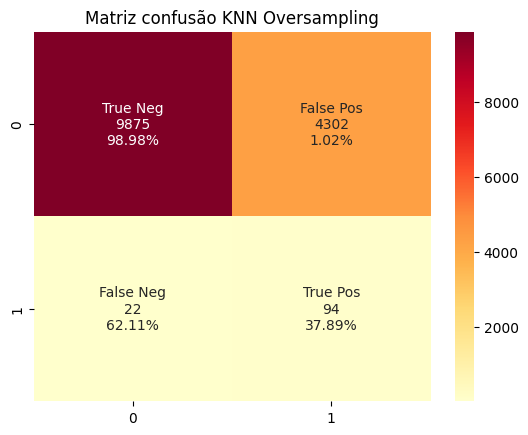

In [ ]:
confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
(tn, fp, fn, tp)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_knn.flatten()]
g = [tn/(tn+fp), fp/(tn+fp), fn/(fn+tp), tp/(fn+tp)]
group_percentages = ["{0:.2%}".format(value) for value in
                     g]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_knn, annot=labels, fmt='', cmap='YlOrRd')
plt.title('Matriz confusão KNN Oversampling')
print(classification_report(y_test, y_pred_knn))


## COMPARAÇÃO DE MODELOS

In [ ]:
Model_com_df = pd.DataFrame(comparacao_modelos).T
Model_com_df.columns = ['Acurácia','Precisão','Recall']
Model_com_df = Model_com_df.sort_values(by='Recall',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='YlOrRd')

,Acurácia,Precisão,Recall
KNN_Oversampling,92.29%,33.67%,88.95%
RL_Undersampling,73.76%,2.58%,85.34%
KNN_Undersampling,69.75%,2.14%,81.03%
RL_Oversampling,78.27%,13.21%,76.32%


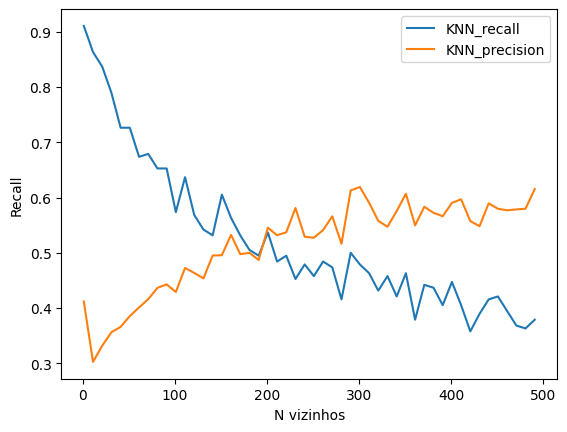

In [ ]:
train = pd.read_csv(r'train.csv')
train.head()
train = pd.get_dummies(train, columns=categoricos)

X = train_data_normalizado.drop(['stroke','id'], axis=1)
y = train_data_normalizado['stroke']

knn_recall = []
ad_recall = []
cont = []
knn_precision = []
for i in range(1, 500, 10):
  sm = SMOTE(random_state=2, k_neighbors=i, sampling_strategy='minority')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
  X_train,y_train=sm.fit_resample(X,y)

  #Classificador KNN
  knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)

  #Métricas KNN
  knn_recall.append(recall_score(y_test, y_pred_knn))
  knn_precision.append(precision_score(y_test, y_pred_knn, average = 'binary'))


  cont.append(i)

plt.plot(cont,knn_recall, label='KNN_recall')
plt.plot(cont,knn_precision, label='KNN_precision')
plt.xlabel('N vizinhos')
plt.ylabel('Recall')
plt.legend()